In [ ]:
# Stažení a instalace knihoven, které budeme používat

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [3]:
# Import knihoven, které budeme používat

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.linear_model import LinearRegression

---
# Regrese

#### Autoři:
* [Martin Vlach](mailto:xvlach@mendelu.cz)
* [Jakub Dolejší](mailto:xdolejsi@mendelu.cz)
---

### Regrese v různých vědních odvětvích
- **Lékařství** - *regrese nemoci*
- **Právo** - *regresy*
- **Filozofie** - *nekonečný regres*
- **Softwarové inženýrství** - *regresní testování*
- <span style="color:#eb4034">**Statistika** - *regresivní analýza*</span>

---
### Regresivní analýza
* Jedna z nejpoužívanějších statistických metod.
* Existuje značné množství variant, přičemž každá je vhodná na jiný typ problému.

</br>

* ***Definice*** - *Označení statistických metod, které souží k odhadu jisté náhodné veličiny na základě znalosti jedné či více jiných veličin. Cílem regresní analýzy je popsat tuto závislost pomocí vhodného modelu.*

    * ***Závislá proměnná*** - *Parametr, jehož hodnotu zkoumáme/hledáme.*
    * ***Nezávislá proměnná*** - *Parametr, jehož hodnota je nám známa. S využítím těchto hodnot je hledána hodnota závislé proměnné. Tyto hodnoty se často označují jako regresory*

#### Dělení regresivních modelů
* Diskrétní hodnoty proměnných **x** Spojité hodnoty proměnných **x** Kombinace
* Jednoduchá **x** Vícenásobná
* Lineární **x** Nelineární závislost
---

### Lineární regrese

#### Jednoduchá lineární regrese

In [82]:
"""
Dataset obsahující záznamy o pohlaví-výška-váha
Zdroj: https://www.kaggle.com/mustafaali96/weight-height
"""

wh_df = pd.read_csv('data/weight-height.csv')
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
""" 
Příklad jednoduché regresivní analýzy (pouze jeden regres)
Z tohoto důvodu budeme zkoumat pouze muže a sloupec pohlaví můžeme ignorovat.
Dále si převedeme hodnoty z datasetu na metrické jednotky, neboť jsou uvedeny v imperiálních hodnotách.
"""

# 1 palec = 2,54 cm
height_constant = 2.54

# 1 libra = 0,45359237 kg
weight_constant = 0.4535923

males_only_df = (wh_df[(wh_df.Gender == 'Male')]).drop('Gender',1) #
males_only_df.Height *= height_constant
males_only_df.Weight *= weight_constant
males_only_df.head()

,Height,Weight
0,187.571423,109.721058
1,174.706036,73.622781
2,188.239668,96.497614
3,182.196685,99.809570
4,177.499761,93.598681


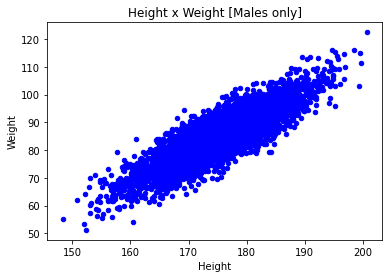

In [84]:
males_only_df.plot.scatter(x="Height", y="Weight", color='b', title='Height x Weight [Males only]');

In [55]:
"""
Ověření lineární korelační závislosti

p - Pearsonův korelační koeficient měří sílu lineární závislosti mezi dvěma veličinami.

OTÁZKA - Jakých hodnot může p nabývat?
"""

p = stats.pearsonr(males_only_df.Height, males_only_df.Weight)
print(f"Hodnota Pearsonova korelačního koeficientu: {p[0]}.")

Hodnota Pearsonova korelačního koeficientu: 0.8629788486163176.


In [ ]:
model = LinearRegression()
model.fit(x.values.reshape((-1, 1)), y)

In [ ]:
plt.scatter(x, y, color = "blue")
plt.plot(x, model.predict(x.values.reshape((-1, 1))), color = "red")
plt.title("Male weight prediction")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [ ]:
input_height = input('Zadejte vaši výšku: ')
weight_predict = model.predict(np.array(float(input_height)).reshape((-1, 1)))
print(f"Predikovaná váha dle lineární regresivní analýzy: {weight_predict[0]} kg.")

#### Vícenásobná lineární regrese

In [129]:
"""
Dataset obsahující záznamy o parametrech prodaných aut
Zdroj: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
"""

#MPG = Počet ujetých mil na jeden Galon (3,785 litru) -> Vyšší je lepší
toLitres = lambda x : 235.214583 / x

column_names = ['mpg', 'horsepower', 'weight', 'acceleration','displacement']

cubic_inch_constant = 16.387064

cars_df = pd.read_csv('data/auto-mpg.csv', usecols=column_names, na_values='?')
cars_df.weight *= weight_constant
cars_df.displacement *= 16.387064
cars_df.dropna()

cars_df.horsepower =  cars_df.horsepower.astype('float')
cars_df.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,5030.828648,130.0,1589.387419,12.0
1,15.0,5735.472400,165.0,1675.116364,11.5
2,18.0,5211.086352,150.0,1558.543143,11.0
3,16.0,4981.667456,150.0,1557.182366,12.0
4,17.0,4948.893328,140.0,1564.439843,10.5


In [130]:
p1 = stats.pearsonr(cars_df['mpg'], cars_df['horsepower'])
p2 = stats.pearsonr(cars_df['mpg'], cars_df['weight'])
p3 = stats.pearsonr(cars_df['mpg'], cars_df['acceleration'])
p4 = stats.pearsonr(cars_df['mpg'], cars_df['displacement'])

print(f"Míra lineární závislosti spotřeba x počet koní: {p1[0]}.")
print(f"Míra lineární závislosti spotřeba x hmotnost: {p2[0]}.")
print(f"Míra lineární závislosti spotřeba x zrychlení: {p3[0]}.")
print(f"Míra lineární závislosti spotřeba x zdvihový objem: {p4[0]}.")


Míra lineární závislosti spotřeba x počet koní: -0.778426783897776.
Míra lineární závislosti spotřeba x hmotnost: -0.8322442148315753.
Míra lineární závislosti spotřeba x zrychlení: 0.4233285369027872.
Míra lineární závislosti spotřeba x zdvihový objem: -0.8051269467104579.


<AxesSubplot:title={'center':'MPG x Zdvihový objem'}, xlabel='displacement', ylabel='mpg'>

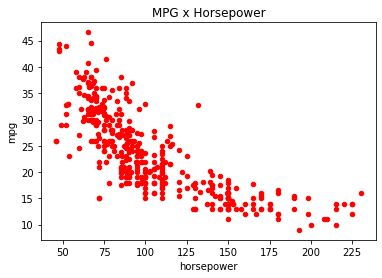

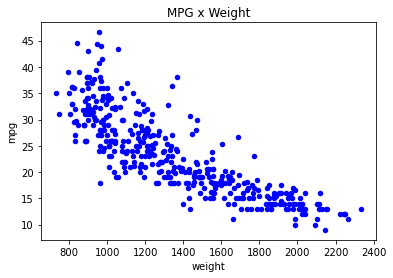

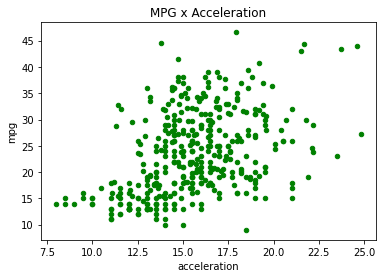

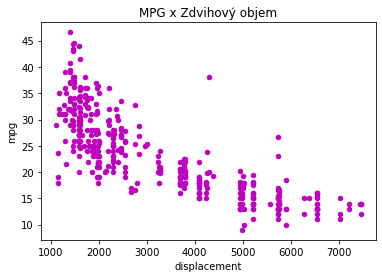

In [131]:
cars_df.plot.scatter(x='horsepower', y='mpg', color='r', title='MPG x Horsepower')
cars_df.plot.scatter(x='weight', y='mpg', color='b', title='MPG x Weight')
cars_df.plot.scatter(x='acceleration', y='mpg', color='g', title='MPG x Acceleration')
cars_df.plot.scatter(x='displacement', y='mpg', color='m', title='MPG x Zdvihový objem')

In [115]:
second_model = LinearRegression()
second_model_x = cars_df[['horsepower', 'acceleration', 'weight', 'displacement']]
second_model_y = cars_df['mpg']
second_model.fit(second_model_x, second_model_y)

LinearRegression()

In [139]:
# Predikce spotřeby jiného staršího vozidla - použijeme Škodu 120
# Zdroj: http://skodaps.wz.cz/S105-136_technicke_1.php
# Nutné však brát v potaz, že věšina aut v datasetu jsou americká auta 

s120_horsepower = 53.0
s120_acceleration = 20.0
s120_weight = 890.0
s120_displacement = 1147.0

s120_stats = np.array([s120_horsepower,s120_acceleration, s120_weight, s120_displacement])
result = second_model.predict(s120_stats.reshape(1, -1))[0]
print("Predikovaná spotřeba vozu škoda 120 {.2f} l/100km.".format(np.round(toLitres(result), 2)))

AttributeError: 'numpy.float64' object has no attribute '2f'